In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, SCORERS

In [ ]:
input_data = pd.read_excel('/gdrive/My Drive/shack labs/DS - Assignment Part 1 data set/DS - Assignment Part 1 data set.xlsx') # Load dataset
input_data.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [ ]:
input_data.shape # Check for number of rows and columns (the dataset contains 414 data points with 9 attributes)

(414, 9)

In [ ]:
input_data.info() # Information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


In [ ]:
input_data.nunique() # Check for number of unique values in every column

Transaction date                             12
House Age                                   236
Distance from nearest Metro station (km)    259
Number of convenience stores                 11
latitude                                    234
longitude                                   232
Number of bedrooms                            3
House size (sqft)                           328
House price of unit area                    270
dtype: int64

In [ ]:
input_data.describe().T # Description about the dataset

,count,mean,std,min,25%,50%,75%,max
Transaction date,414.0,2013.148953,0.281995,2012.666667,2012.916667,2013.166667,2013.416667,2013.583333
House Age,414.0,17.712560,11.392485,0.000000,9.025000,16.100000,28.150000,43.800000
Distance from nearest Metro station (km),414.0,1083.885689,1262.109595,23.382840,289.324800,492.231300,1454.279000,6488.021000
Number of convenience stores,414.0,4.094203,2.945562,0.000000,1.000000,4.000000,6.000000,10.000000
latitude,414.0,24.969030,0.012410,24.932070,24.963000,24.971100,24.977455,25.014590
longitude,414.0,121.533361,0.015347,121.473530,121.528085,121.538630,121.543305,121.566270
Number of bedrooms,414.0,1.987923,0.818875,1.000000,1.000000,2.000000,3.000000,3.000000
House size (sqft),414.0,931.475845,348.910269,402.000000,548.000000,975.000000,1234.750000,1500.000000
House price of unit area,414.0,37.980193,13.606488,7.600000,27.700000,38.450000,46.600000,117.500000


In [ ]:
# Drop "Transaction date" column as it does not affect the price
data = input_data.drop(['Transaction date'], axis=1, inplace=False)
data

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,5.0,390.56840,5,24.97937,121.54245,1,491,43.1
...,...,...,...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381,3,803,15.4
410,5.6,90.45606,9,24.97433,121.54310,2,1278,50.0
411,18.8,390.96960,7,24.97923,121.53986,1,503,40.6
412,8.1,104.81010,5,24.96674,121.54067,1,597,52.5


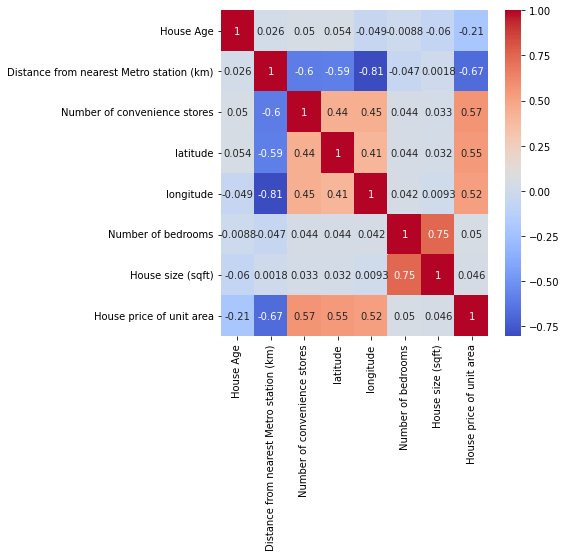

In [ ]:
correlation = data.corr() # Find the correlation between the features
plt.figure(figsize=(6,6))
sns.heatmap(correlation,annot=True,cmap='coolwarm')
plt.show()

Since none of the features are highly correlated, we would retain all the attributes

In [ ]:
# Splitting features and output
X = data.drop(["House price of unit area"], axis = 1)
y = data[["House price of unit area"]]

In [ ]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
# Linear Regression Model
regressor_L = LinearRegression()
regressor_L.fit(X_train, y_train)
predict_test_data_L = regressor_L.predict(X_test)

# Evaluate Linear Regression model
mae = mean_absolute_error(y_test, predict_test_data_L)
mse = mean_squared_error(y_test, predict_test_data_L)
r2 = r2_score(y_test, predict_test_data_L)

print("Linear Regression Model performance:")
print("___________________________________")
print('Mean Absolute Error is {}'.format(round(mae, 4)))
print('Mean Square Error is {}'.format(round(mse, 4)))
print('Root Mean Square Error is {}'.format(round(mse**(0.5), 4)))
print('R2-Score is {}'.format(round(r2, 4)))

Linear Regression Model performance:
___________________________________
Mean Absolute Error is 5.4033
Mean Square Error is 56.8841
Root Mean Square Error is 7.5422
R2-Score is 0.6609


In [ ]:
# Decision Tree
regressor_DT = DecisionTreeRegressor()
regressor_DT.fit(X_train,y_train)

predict_test_data_DT = regressor_DT.predict(X_test)

# Evaluate Decision Tree Regression model
mae = mean_absolute_error(y_test, predict_test_data_DT)
mse = mean_squared_error(y_test, predict_test_data_DT)
r2 = r2_score(y_test, predict_test_data_DT)

print("Decision Tree Regression Model performance:")
print("____________________________________________")
print('Mean Absolute Error is {}'.format(round(mae, 4)))
print('Mean Square Error is {}'.format(round(mse, 4)))
print('Root Mean Square Error is {}'.format(round(mse**(0.5), 4)))
print('R2-Score is {}'.format(round(r2, 4)))

Decision Tree Regression Model performance:
____________________________________________
Mean Absolute Error is 5.6675
Mean Square Error is 62.9986
Root Mean Square Error is 7.9372
R2-Score is 0.6245


In [ ]:
# Random-Forest Regression
regressor_RF = RandomForestRegressor(n_estimators=20, random_state=0)  
regressor_RF.fit(X_train, y_train)  

predict_test_data_RF = regressor_RF.predict(X_test)

# Evaluate Random Forest Regression model
mae = mean_absolute_error(y_test, predict_test_data_RF)
mse = mean_squared_error(y_test, predict_test_data_RF)
r2 = r2_score(y_test, predict_test_data_RF)

print("Random Forest Regression Model performance:")
print("___________________________________")
print('Mean Absolute Error is {}'.format(round(mae, 4)))
print('Mean Square Error is {}'.format(round(mse, 4)))
print('Root Mean Square Error is {}'.format(round(mse**(0.5), 4)))
print('R2-Score is {}'.format(round(r2, 4)))


Random Forest Regression Model performance:
___________________________________
Mean Absolute Error is 4.1128
Mean Square Error is 32.1558
Root Mean Square Error is 5.6706
R2-Score is 0.8083


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R-Square score for Random Forest Regression model is higher and close to 1 compared to linear regression and decision tree regression models. Hence, Random forest regression model can be recommended as the final prediction model.